# **Import main libraries**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "F:\HEKIDESK\Heart_Sound_Dataset\Heart_Sound_HEKIDESK"
print(os.listdir(data_path))

['murmur', 'normal', 'unlabel']


In [3]:
tarin_data      = data_path 
unlabel_data    = data_path  + "/unlabel/"
normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'

In [4]:
print("Normal files:", len(os.listdir(normal_data))) #length of normal training sounds
print("Murmur files:",len(os.listdir(murmur_data))) #length of murmur training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data)))

Normal files: 351
Murmur files: 129
TOTAL TRAIN SOUNDS: 480


# **EDA and Visualization**

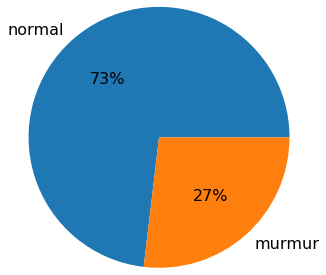

In [5]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data))])
labels = ['normal', 'murmur']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

In [6]:
# Listen to random audio from specific class
import IPython.display as ipd
def random_sound (audio_class):
    random_sound = np.random.randint(0,len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = audio_class+sound
    sound,sample_rate = librosa.load(sound)
    return ipd.Audio(sound,rate=sample_rate),sound, sample_rate

In [6]:
# show waveform of audio from dataset 
# X axis, represents time.
# Y-axis measures displacement of air molecules.
# This is where amplitude comes in. It measures how much a molecule is displaced from its resting position. 
import librosa #To deal with Audio files
import librosa.display

def show_audio_waveform(audio_sample):
    plt.figure(figsize=(20,5))
    librosa.display.waveshow(audio_sample, max_points = 22050)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

In [8]:
# show spectrum of audio from dataset 
def show_audio_spectrum(audio_sample):
    sample_rate = 22050
    fft_normal = np.fft.fft(audio_sample)
    magnitude_normal = np.abs(fft_normal)
    freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
    half_freq = freq_normal[:int(len(freq_normal)/2)]
    half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

    plt.figure(figsize=(12,8))
    plt.plot(half_freq,half_magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

In [9]:
# show specrogram of audio from dataset 
# the output is an image that represents a sound. 
# X-axis is for time, y-axis is for frequency and the color is for intensity

import librosa #To deal with Audio files
import librosa.display

def show_spectrogram (audio_sample):    
    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft_normal = librosa.stft(audio_sample, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft_normal)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # display spectrogram
    plt.figure(figsize=(15,10))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    #plt.set_cmap("YlOrBr")
    plt.title("Spectrogram")

In [10]:
# MFCCs
# extract 52 MFCCs
def show_mfcc_features(audio_sample, sample_rate):
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050
    
#     MFCCs = librosa.feature.mfcc(audio_sample, sample_rate, n_mfcc=52, hop_length=hop_length, n_fft=n_fft)
    MFCCs = librosa.feature.mfcc(y=audio_sample, sr=sample_rate, n_mfcc=52, hop_length=hop_length, n_fft=n_fft)
#     MFCCs = librosa.feature.mfcc(audio_sample, sample_rate, n_mfcc=52)

    # display MFCCs
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")
    plt.show()

# **Dataset Classes**
## ***1. Normal***
Most normal heart rates at rest will be between about 60 and 100 beats (‘lub dub’s) per minute.

In [11]:
normal_audio, normal_sample, sample_rate = random_sound(normal_data)
normal_audio

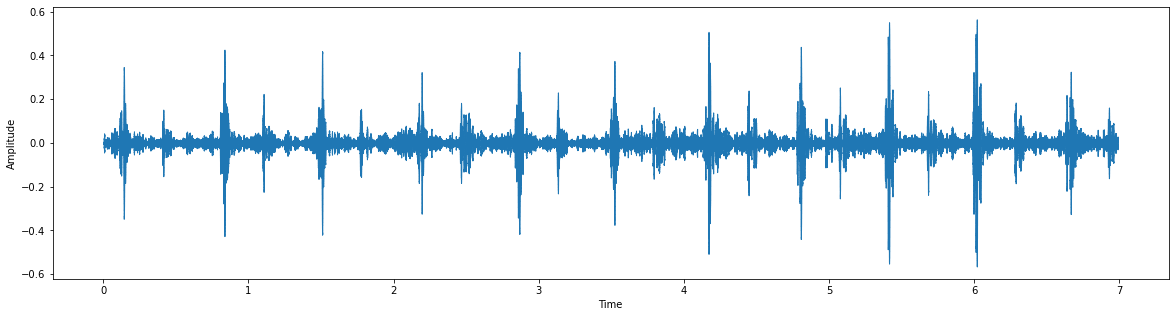

In [12]:
show_audio_waveform(normal_sample)

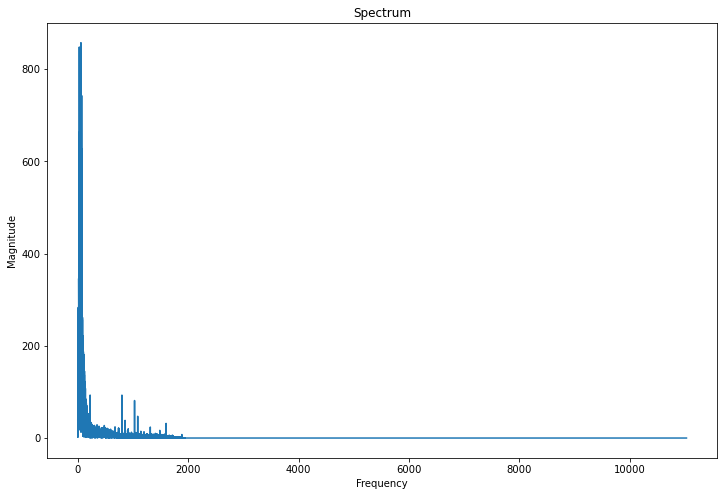

In [13]:
show_audio_spectrum(normal_sample)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


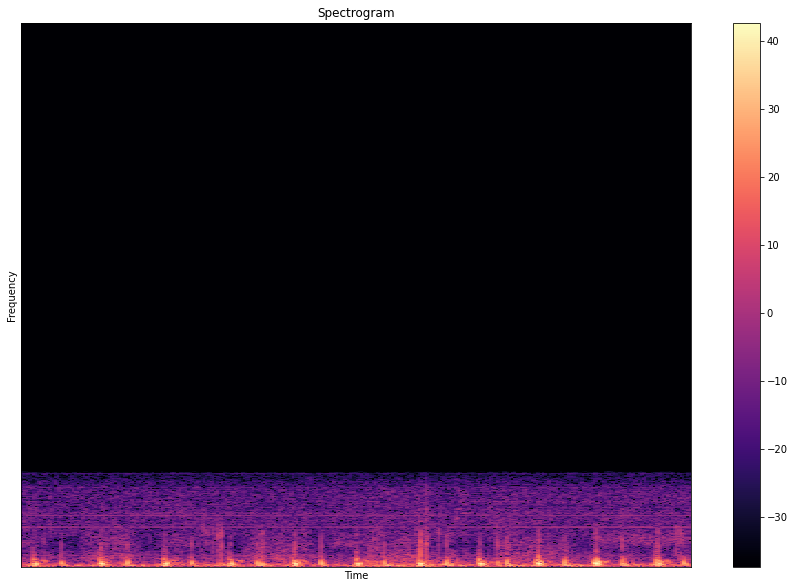

In [14]:
show_spectrogram(normal_sample)

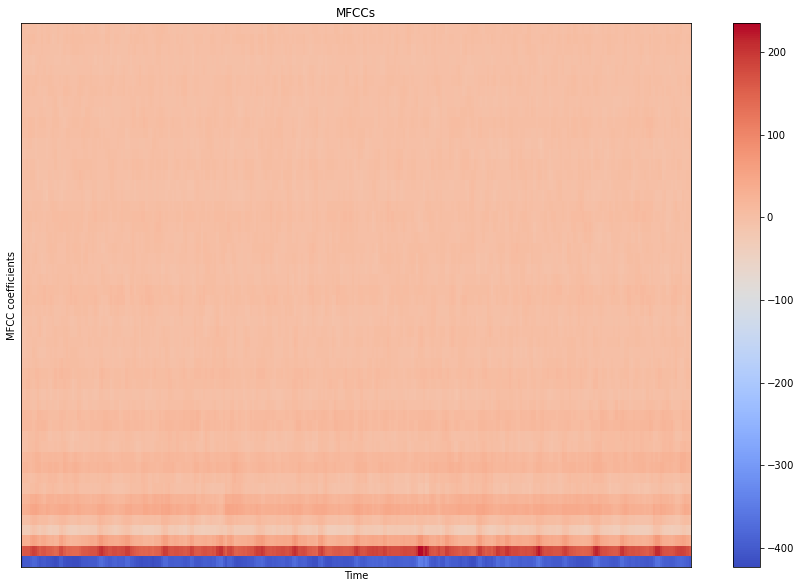

In [15]:
show_mfcc_features(normal_sample, sample_rate)

## ***2. Murmur sound***
Heart murmurs sound as though there is a “whooshing, roaring, rumbling, or turbulent fluid” noise in one of two temporal locations: (1) between “lub” and “dub”, or (2) between “dub” and “lub”. They can be a symptom of many heart disorders, some serious.

In [16]:
murmur_audio, murmur_sample, sample_rate = random_sound(murmur_data)
murmur_audio

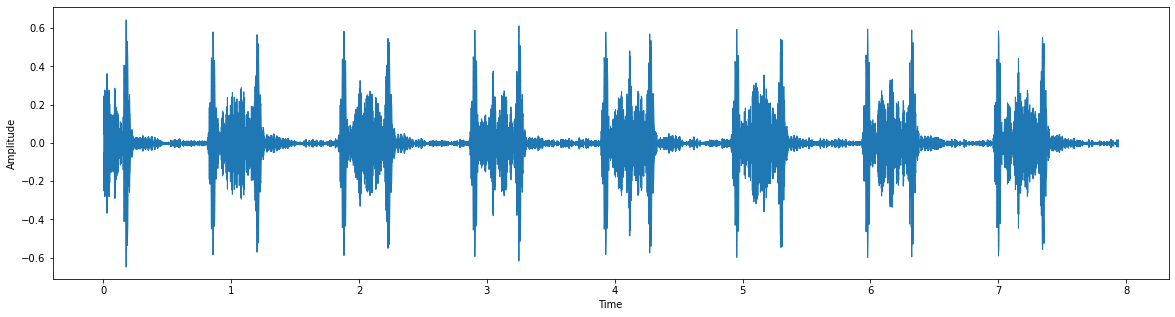

In [17]:
show_audio_waveform(murmur_sample)

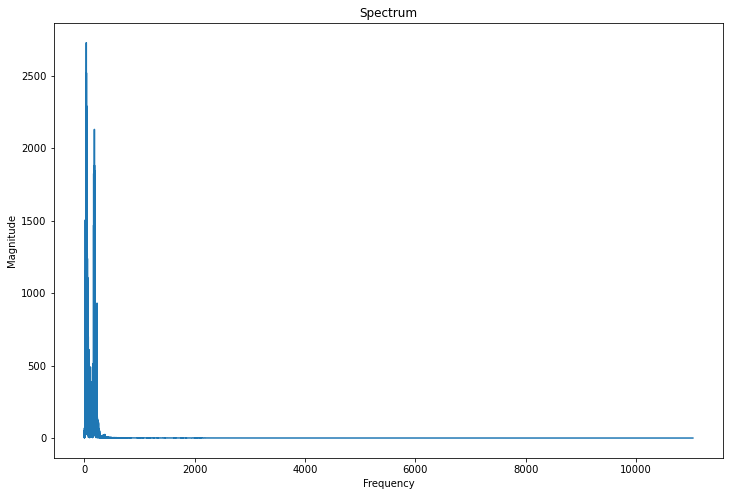

In [18]:
show_audio_spectrum(murmur_sample)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


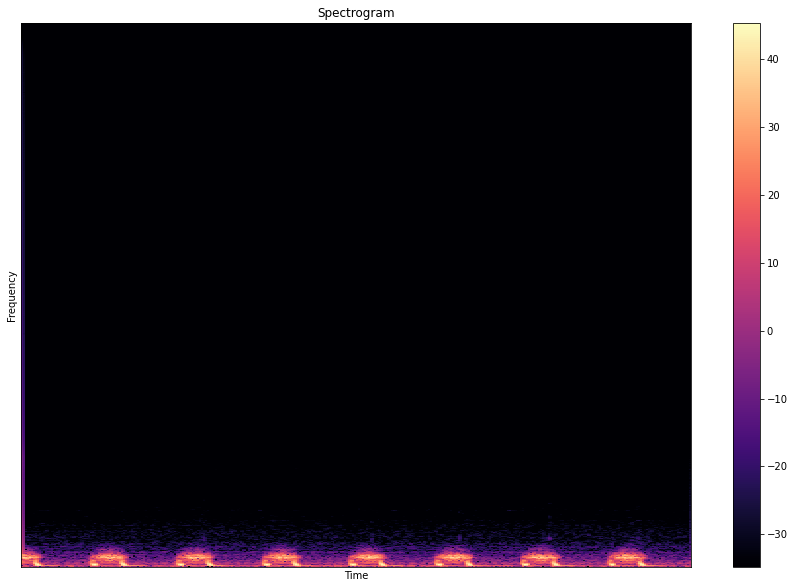

In [19]:
show_spectrogram(murmur_sample)

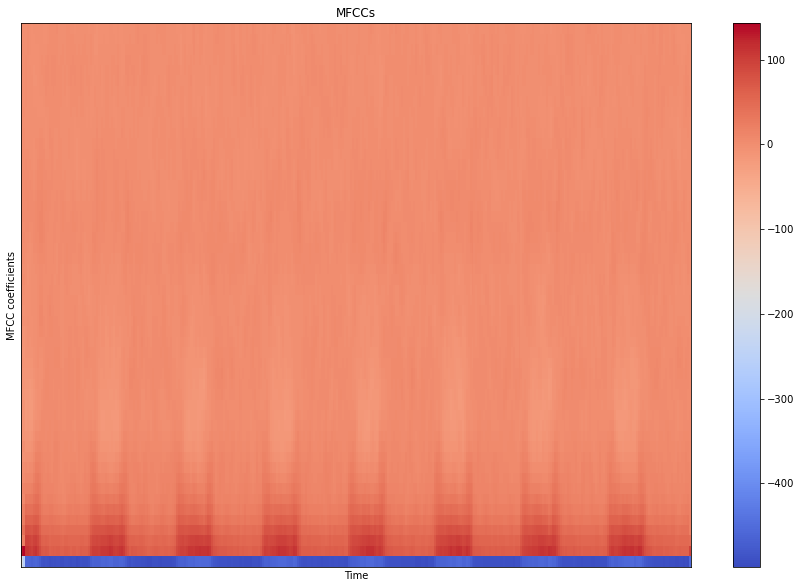

In [20]:
show_mfcc_features(murmur_sample, sample_rate)

# **Data Preprocessing**

In [21]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate=rate)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

In [22]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    '''
        Extract MFCC feature from the Sound data from the audio data. 
        Augmentation of sound data by adding Noise, streaching and shifting.
        52 features are extracted from each audio data and used to train the model.
        
        Args: 
            dir_: Input directory to the Sound input file.
        
        Returns:
            data: list of features extracted from the sound file.
    '''
    input_length=sr*duration
    features = 52
    data = []
    for file_name in file_names:
        try:
            sound_file = folder+file_name
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                X = librosa.util.fix_length(X, size=input_length)  
                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=features).T,axis=0) 
            feature = np.array(mfccs).reshape([-1,1])
            data.append(feature)
            
            stretch_data_1 = stretch (X, 0.8)
            mfccs_stretch_1 = np.mean(librosa.feature.mfcc(y=stretch_data_1, sr=sr, n_mfcc=features).T,axis=0) 
            feature_1 = np.array(mfccs_stretch_1).reshape([-1,1])
            data.append(feature_1)
            
            stretch_data_2 = stretch (X, 1.2) 
            mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=stretch_data_2, sr=sr, n_mfcc=features).T,axis=0) 
            feature_2 = np.array(mfccs_stretch_2).reshape([-1,1])
            data.append(feature_2)
            
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        
    return data

# **Encoding**

In [23]:
# simple encoding of categories, convert to only 3 types:
# Normal (Include extrahls and extrastole)
# Murmur
# Artifact

# Map label text to integer
CLASSES = ['murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'murmur': 0, 'normal': 1}
 
{0: 'murmur', 1: 'normal'}


# **Data Augmenation and Feature Extraction**

In [24]:
import fnmatch

# 22 KHz
SAMPLE_RATE = 22050
# 10 seconds
MAX_SOUND_CLIP_DURATION=10

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_sounds]

# 22 KHz
SAMPLE_RATE = 22050
# 10 seconds
MAX_SOUND_CLIP_DURATION=10

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_sounds]

print ("Loading Done")

fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght : normal_noisynormal_108_1305654420093_A.wav
fixing audio lenght : normal_noisynormal_109_1305653972028_A.wav
fixing audio lenght : normal_noisynormal_109_1305653972028_C.wav
fixing audio lenght : normal_noisynormal_109_1305653972028_E.wav
fixing audio lenght : normal_noisynormal_110_1305655332337_A.wav
fixing audio lenght : normal_noisynormal_110_1305655332337_B.wav
fixing audio lenght : normal_noisynormal_113_1306244002866_A.wav
fixing audio lenght : normal_noisynormal_113_1306244002866_B.wav
fixing audio lenght : normal_noisynormal_115_1306259437619_A1.wav
fixing audio lenght : normal_noisynormal_115_1306259437619_B.wav
fixing audio lenght : no

In [25]:
# unlabel_datala files
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]

print ("Loading of unlabel data done")

fixing audio lenght : Bunlabelledtest__101_1305030823364_F.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_A.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_C.wav
fixing audio lenght : Bunlabelledtest__106_1306776721273_B.wav
fixing audio lenght : Bunlabelledtest__106_1306776721273_D.wav
fixing audio lenght : Bunlabelledtest__107_1305654946865_B.wav
fixing audio lenght : Bunlabelledtest__109_1305653972028_B.wav
fixing audio lenght : Bunlabelledtest__109_1305653972028_D.wav
fixing audio lenght : Bunlabelledtest__112_1306243000964_C.wav
fixing audio lenght : Bunlabelledtest__113_1306244002866_C.wav
fixing audio lenght : Bunlabelledtest__117_1306262456650_B1.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_A.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_A1.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_C2.wav
fixing audio lenght : Bunlabelledtest__122_1306325762831_A.wav
fixing audio lenght : Bunlabelledtest__122_130632576

# **Concatenation**

In [26]:
#combine set-a and set-b 
x_data = np.concatenate((normal_sounds, murmur_sounds))
y_data = np.concatenate((normal_labels, murmur_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  1440 741


# **Data Split**

In [27]:
import tensorflow as tf

from keras.utils import np_utils
# from keras.layers.merge import concatenate
from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv1D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import Input, add, Flatten, Dense, BatchNormalization, Dropout, LSTM, GRU
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D, Activation, LeakyReLU, ReLU

from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train-1, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test-1, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val-1, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

# **Correct Imbalnced Data**

In [28]:
# class weight 
TRAIN_IMG_COUNT = 578
COUNT_0 = 129 #murmur
COUNT_1 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 1.4935400516795865, 1: 0.4710676446617767}

# **LSTM Model**

In [29]:
x_train_lstm = x_train
x_val_lstm = x_test
x_test_lstm = x_val

y_train_lstm = y_train
y_val_lstm = y_test
y_test_lstm = y_val

# **Build Model**

In [30]:
lstm_model = Sequential()

lstm_model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

lstm_model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

lstm_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

lstm_model.add(LSTM(256, return_sequences=True))
lstm_model.add(LSTM(128))


lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(2, activation='softmax'))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 2048)          12288     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26, 2048)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 2048)         8192      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 1024)          10486784  
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 1024)         0         
 1D)                                                             
                                                        

In [31]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
lstm_model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cb = [EarlyStopping(patience=20,monitor='val_accuracy',mode='max',restore_best_weights=True),
      ModelCheckpoint("/kaggle/working/Heart_LSTM_CNN_1.h5",save_best_only=True)]

# **Train Model**

In [32]:
history = lstm_model.fit(x_train_lstm, y_train_lstm, 
                         validation_data=(x_val_lstm, y_val_lstm),
                         batch_size=8, epochs=250, 
                         class_weight=class_weight,callbacks = cb )

Epoch 1/250
130/130 [==============================] - 87s 576ms/step - loss: 0.4920 - accuracy: 0.5058 - val_loss: 0.7745 - val_accuracy: 0.2604
Epoch 2/250
130/130 [==============================] - 78s 601ms/step - loss: 0.4843 - accuracy: 0.4624 - val_loss: 0.6622 - val_accuracy: 0.7326
Epoch 3/250
130/130 [==============================] - 77s 590ms/step - loss: 0.4741 - accuracy: 0.5598 - val_loss: 0.6566 - val_accuracy: 0.7153
Epoch 4/250
130/130 [==============================] - 72s 558ms/step - loss: 0.4713 - accuracy: 0.5656 - val_loss: 0.7657 - val_accuracy: 0.3403
Epoch 5/250
130/130 [==============================] - 72s 555ms/step - loss: 0.4790 - accuracy: 0.5840 - val_loss: 0.7328 - val_accuracy: 0.4861
Epoch 6/250
130/130 [==============================] - 73s 561ms/step - loss: 0.4670 - accuracy: 0.5666 - val_loss: 0.6076 - val_accuracy: 0.7986
Epoch 7/250
130/130 [==============================] - 74s 570ms/step - loss: 0.4545 - accuracy: 0.6178 - val_loss: 0.6049 -

# Saving the model
## With Keras:

In [1]:
# lstm_model.save('F:\HEKIDESK\My Codes\Heart_Sound_Classification_Model.h5')

# Loading the Model:
from tensorflow.keras.models import load_model
file_name = 'F:\HEKIDESK\My Codes\Heart_Sound_Classification_Model.h5'
lstm_model = load_model(file_name)

# **Evaluate Model**

In [42]:
lstm_model.evaluate(x_val_lstm, y_val_lstm)

9/9 [==============================] - 6s 145ms/step - loss: 0.0434 - accuracy: 0.9826


[0.043422386050224304, 0.9826388955116272]

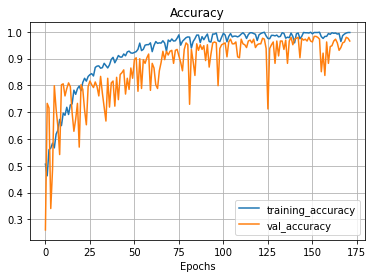

In [43]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
#   plt.plot(epochs, loss, label='training_loss')
#   plt.plot(epochs, val_loss, label='val_loss')
#   plt.title('Loss')
#   plt.xlabel('Epochs')
#   plt.legend()
#   plt.grid()


  # Plot accuracy
  plt.figure()
  plt.grid()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  
plot_loss_curves(history)

# **Results**

4/4 [==============================] - 1s 125ms/step


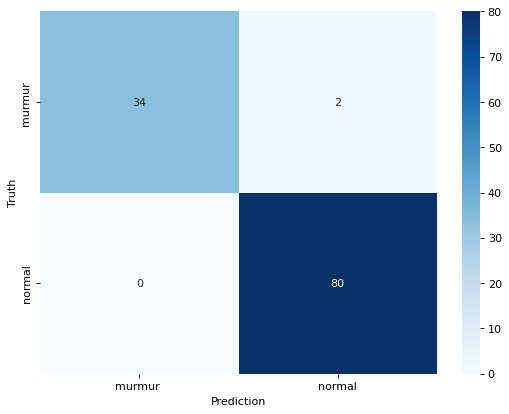

In [45]:
import seaborn as sns

classes = ["murmur ", "normal"]

preds = lstm_model.predict(x_test_lstm)
classpreds = [ np.argmax(t) for t in preds ]
y_testclass = [np.argmax(t) for t in y_test_lstm]
cm = confusion_matrix(y_testclass, classpreds)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [46]:
print(classification_report(y_testclass, classpreds, target_names=classes))

              precision    recall  f1-score   support

     murmur        1.00      0.94      0.97        36
      normal       0.98      1.00      0.99        80

    accuracy                           0.98       116
   macro avg       0.99      0.97      0.98       116
weighted avg       0.98      0.98      0.98       116

